In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA CLEANING AND LOADING

In [2]:
df = pd.read_csv("netflix_content_2023.csv")

In [3]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [6]:
df = df.dropna(subset=['Hours Viewed'])
df['Available Globally?'] = df['Available Globally?'].astype('category')
df['content type'] = df['Content Type'].astype('category')
df['Language Indicator'] = df['Language Indicator'].astype('category')
df['Release Date'] = df['Release Date'].astype('category')

# EXPLORATORY DATA ANALYSIS

In [7]:
df.describe()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,content type
count,24812,24812,8166,24812,24812,24812,24812
unique,19158,2,1783,889,6,2,2
top,The Night Agent: Season 1,No,2020-03-20,"1,00,000",English,Movie,Movie
freq,2,17162,28,4046,17268,14104,14104


In [9]:
df['Content Type'].value_counts()

Content Type
Movie    14104
Show     10708
Name: count, dtype: int64

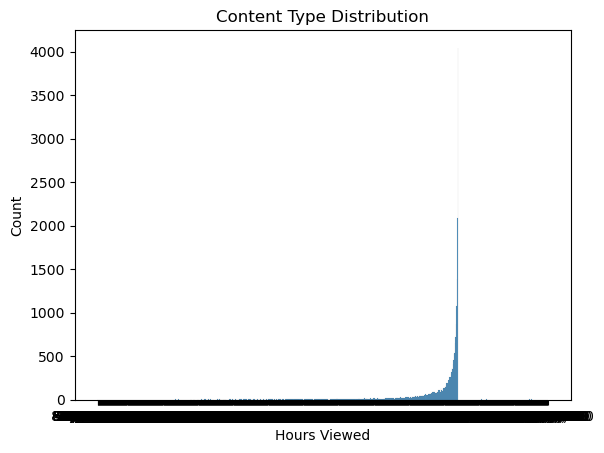

In [10]:
sns.histplot(df['Hours Viewed'], bins=20)
plt.title('Content Type Distribution')
plt.show()

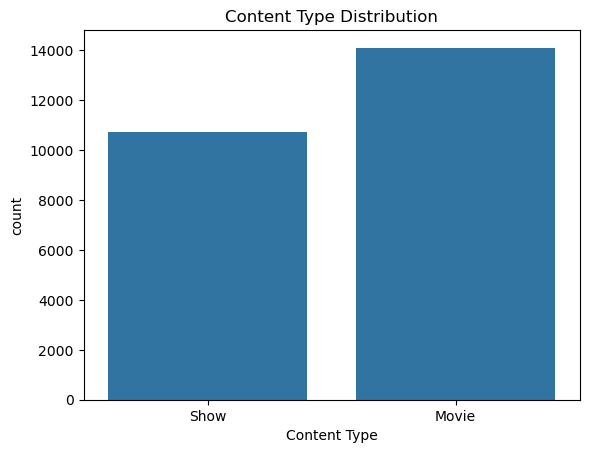

In [11]:
sns.countplot(x='Content Type', data=df)
plt.title('Content Type Distribution')
plt.show()

# BIVARIATE ANALYSIS

In [13]:
df['Content Type'].dtype

dtype('O')

In [15]:
df['Hours Viewed'].iloc[0]

'81,21,00,000'

In [16]:
def convert_hours_viewed(s):
    if isinstance(s, list):
        try:
            return [float(x) for x in s]
        except ValueError:
            return [float(str(x).replace(',','.')) for x in s if x not in (None, '')]
    elif isinstance(s, str):
        try:
            return [float(x.strip().replace(',', '.')) for x in s.split(',') if x.strip()]
        except ValueError:
            return []
        else:
            return []

In [17]:
df['Hours Viewed'] = df['Hours Viewed'].apply(convert_hours_viewed)

In [19]:
print(df['Hours Viewed'].apply(type).value_counts())

print(df['Hours Viewed'].head(10))

Hours Viewed
<class 'list'>    24812
Name: count, dtype: int64
0    [81.0, 21.0, 0.0, 0.0]
1    [66.0, 51.0, 0.0, 0.0]
2    [62.0, 28.0, 0.0, 0.0]
3    [50.0, 77.0, 0.0, 0.0]
4    [50.0, 30.0, 0.0, 0.0]
5     [44.0, 6.0, 0.0, 0.0]
6    [42.0, 96.0, 0.0, 0.0]
7    [40.0, 25.0, 0.0, 0.0]
8    [30.0, 21.0, 0.0, 0.0]
9    [26.0, 62.0, 0.0, 0.0]
Name: Hours Viewed, dtype: object


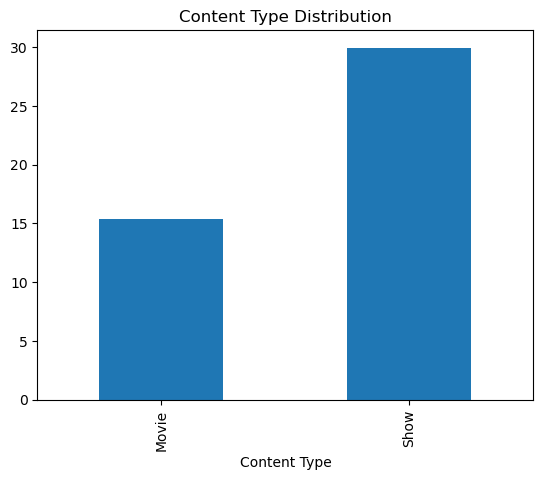

In [20]:
df['Avg Hours'] = df['Hours Viewed'].apply(lambda x: sum(x) if x else 0)

grouped = df.groupby('Content Type')['Avg Hours'].mean()
grouped.plot(kind='bar')
plt.title('Content Type Distribution')
plt.show()

C:\Users\jekugabrandon\AppData\Local\Temp\ipykernel_1164\3313581754.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Release Date')['Avg Hours'].mean()


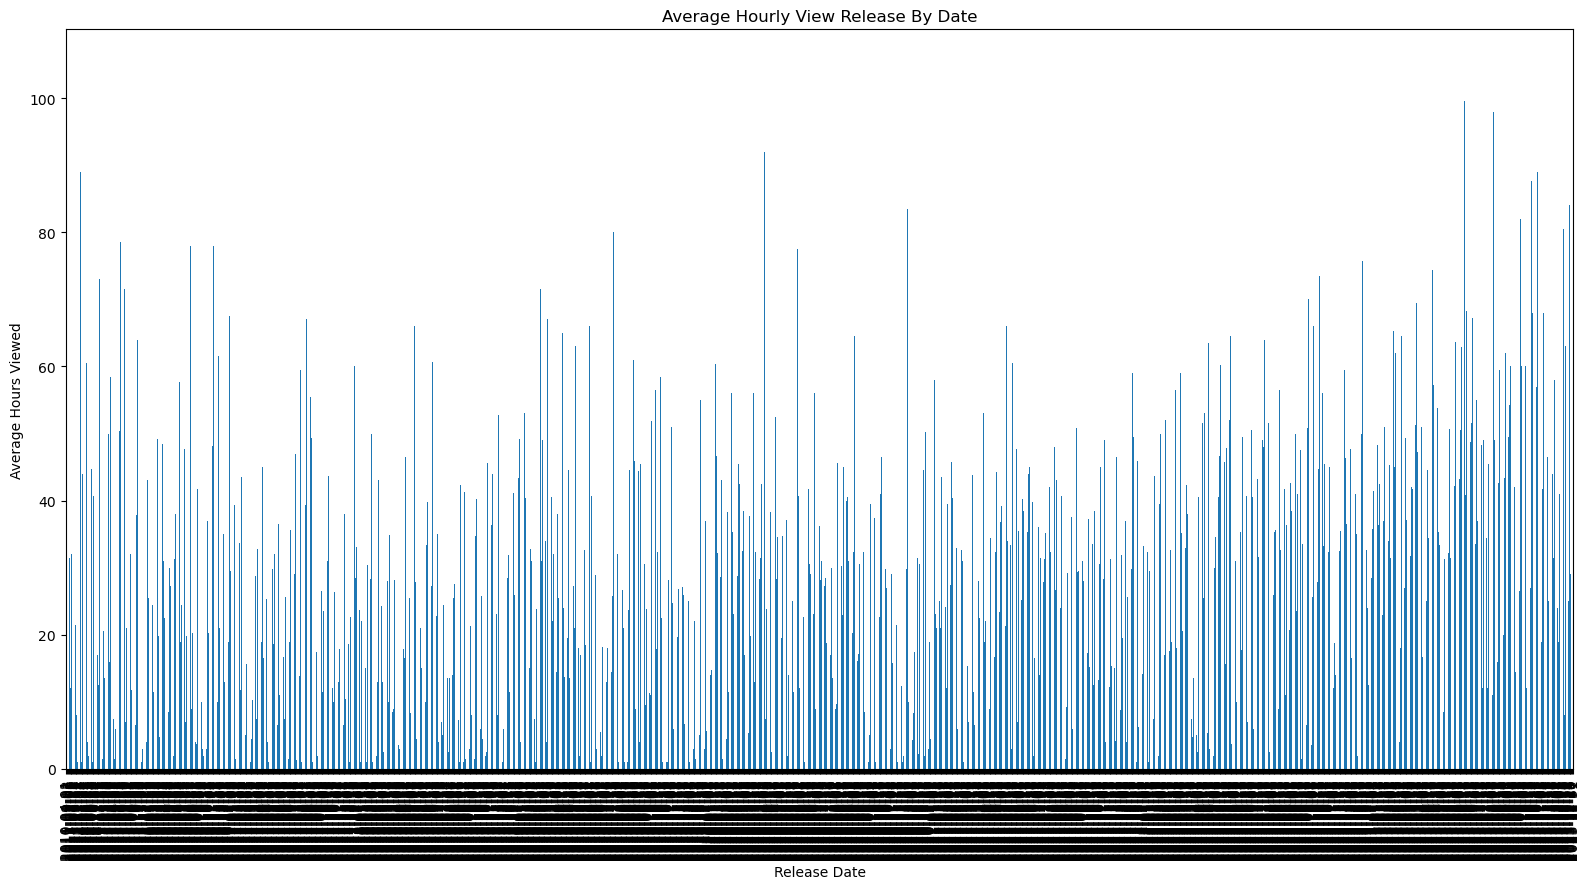

In [21]:
grouped = df.groupby('Release Date')['Avg Hours'].mean()
grouped.plot(kind='bar', figsize=(16,9))
plt.title('Average Hourly View Release By Date')
plt.xlabel('Release Date')
plt.ylabel('Average Hours Viewed')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\jekugabrandon\AppData\Local\Temp\ipykernel_1164\3856568636.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='Avg Hours',


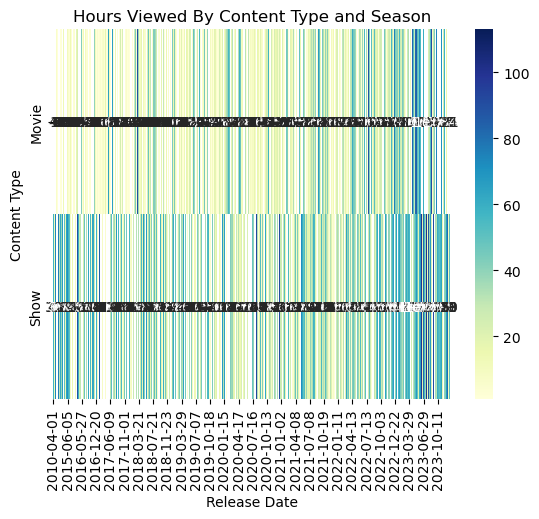

In [23]:
pivot_table = df.pivot_table(values='Avg Hours', 
                            index='Content Type', columns='Release Date', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Hours Viewed By Content Type and Season')
plt.xticks(rotation=90)
plt.show()

## Insights
- TV shows have higher viewership than movies.
- Winter releases see the most engagement.

## Recommendations
- Focus on TV shows for winter releases to maximize viewership.

## END OF ANALYSIS WE CONTINUE IMPROVING THE PROJECT....